In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
df=pd.read_csv(r"C:\Users\HP\car-price-prediction-ml\data\car_data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

In [11]:
df.describe

<bound method NDFrame.describe of     Car_Name  Year  Selling_Price  ...  Selling_type  Transmission Owner
0       ritz  2014           3.35  ...        Dealer        Manual     0
1        sx4  2013           4.75  ...        Dealer        Manual     0
2       ciaz  2017           7.25  ...        Dealer        Manual     0
3    wagon r  2011           2.85  ...        Dealer        Manual     0
4      swift  2014           4.60  ...        Dealer        Manual     0
..       ...   ...            ...  ...           ...           ...   ...
296     city  2016           9.50  ...        Dealer        Manual     0
297     brio  2015           4.00  ...        Dealer        Manual     0
298     city  2009           3.35  ...        Dealer        Manual     0
299     city  2017          11.50  ...        Dealer        Manual     0
300     brio  2016           5.30  ...        Dealer        Manual     0

[301 rows x 9 columns]>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [12]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [26]:
df.rename(columns={'Car_Name':'Car', 'Fuel_Type':'Fuel', 'Driven_kms':'Km', 'Selling_Price':'SP'},inplace=True)
df.columns

Index(['Car', 'Year', 'SP', 'Present_Price', 'Km', 'Fuel', 'Selling_type',
       'Transmission', 'Owner'],
      dtype='object')

In [14]:
df.head()

,Car,Year,SP,Present_Price,Km,Fuel,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [15]:
df.isnull().sum()

Car              0
Year             0
SP               0
Present_Price    0
Km               0
Fuel             0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [16]:
df.dtypes

Car               object
Year               int64
SP               float64
Present_Price    float64
Km                 int64
Fuel              object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [17]:
df[df.duplicated()].count().sum()

np.int64(18)

In [22]:
df=df.drop_duplicates()
df[df.duplicated()].count().sum()

np.int64(0)

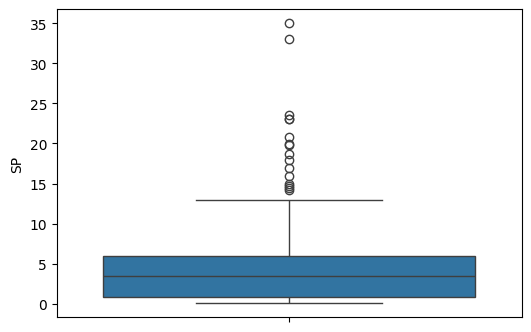

In [27]:
plt.figure(figsize=(6,4))
sns.boxplot(df['SP'])
plt.show()

In [28]:
df.max

<bound method DataFrame.max of          Car  Year     SP  ...  Selling_type  Transmission Owner
0       ritz  2014   3.35  ...        Dealer        Manual     0
1        sx4  2013   4.75  ...        Dealer        Manual     0
2       ciaz  2017   7.25  ...        Dealer        Manual     0
3    wagon r  2011   2.85  ...        Dealer        Manual     0
4      swift  2014   4.60  ...        Dealer        Manual     0
..       ...   ...    ...  ...           ...           ...   ...
296     city  2016   9.50  ...        Dealer        Manual     0
297     brio  2015   4.00  ...        Dealer        Manual     0
298     city  2009   3.35  ...        Dealer        Manual     0
299     city  2017  11.50  ...        Dealer        Manual     0
300     brio  2016   5.30  ...        Dealer        Manual     0

[299 rows x 9 columns]>

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,299.0,2013.615385,2.896868,2003.00,2012.00,2014.00,2016.00,2018.0
SP,299.0,4.589632,4.984240,0.10,0.85,3.51,6.00,35.0
Present_Price,299.0,7.541037,8.566332,0.32,1.20,6.10,9.84,92.6
Km,299.0,36916.752508,39015.170352,500.00,15000.00,32000.00,48883.50,500000.0
Owner,299.0,0.043478,0.248720,0.00,0.00,0.00,0.00,3.0
